In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.integrate import quad

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
haar_wavelet = lambda x: 0 if x < 0 else 1 if x < 0.5 else -1 if x <= 1 else 0

fi = lambda m, k, t: haar_wavelet(t* 2 ** m - k) * 2 ** (m / 2)
frequency = 1000
N = 1024

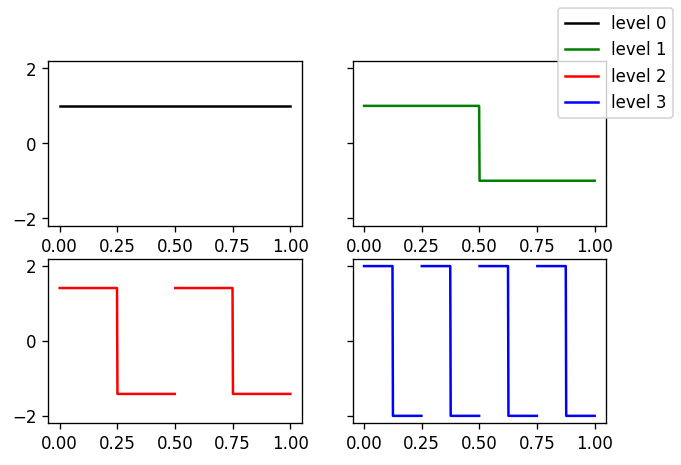

In [3]:
def get_values(m, k, x):
    values = np.array(list(map(lambda t: fi(m, k, t), x)))
    values[np.abs(values) < 1e-5] = None
    return values

x = np.linspace(0, 1, 512)
f, sub = plt.subplots(2, 2, sharey=True, dpi=120)
sub[0][0].plot([0, 1], [1, 1], 'black', label='level 0')
sub[0][1].plot(x, get_values(0, 0, x), 'g', label='level 1')
sub[1][0].plot(x, get_values(1, 0, x), 'r', label='level 2')
sub[1][0].plot(x, get_values(1, 1, x), 'r')
sub[1][1].plot(x, get_values(2, 0, x), 'b', label='level 3')
sub[1][1].plot(x, get_values(2, 1, x), 'b')
sub[1][1].plot(x, get_values(2, 2, x), 'b')
sub[1][1].plot(x, get_values(2, 3, x), 'b')
f.legend()
plt.show()

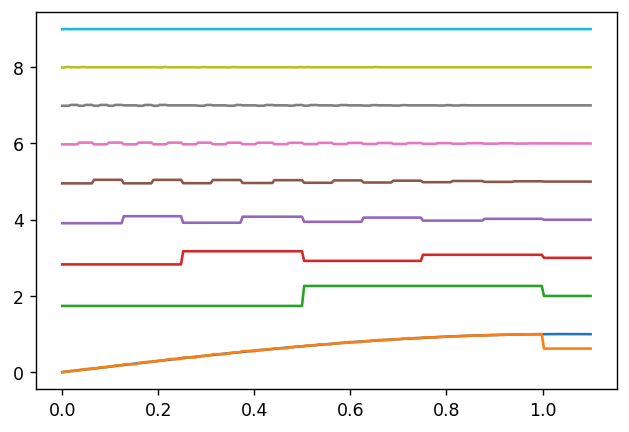

In [21]:
func = lambda t: np.sin(t * 1.5) if t < 1.1 else 0
level = 8
c = np.zeros((level, 2**(level - 1)))
for m in range(level):
    for k in range(2**m):
        c[m, k] = quad(lambda t: func(t) * fi(m, k, t), 0, 1)[0]

value = quad(func, 0, 1)[0]
for m in range(level):
    for k in range(2**m):
        value += c[m, k] * fi(m, k, 0.45)

x = np.linspace(0, 1.1, 250)

values = np.zeros((level, len(x)))
for i, value in enumerate(x):
    for m in range(level):
        for k in range(2**m):
            values[m][i] += c[m, k] * fi(m, k, value)

plt.figure(dpi=125)
y = quad(func, 0, 1)[0] + values[0]
for i in range(1, level):
    y += values[i]
plt.plot(x, np.sin(x * 1.5))
plt.plot(x, y)
for i in range(level):
    plt.plot(x, values[i] + i + 2)
plt.show()

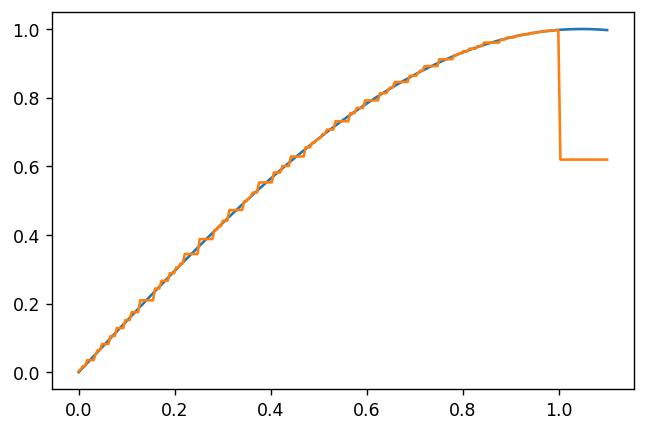

In [22]:
values = np.empty(len(x))
for i, value in enumerate(x):
    values[i] = quad(func, 0, 1)[0]
    for m in range(level):
        for k in range(2**m):
            values[i] += c[m, k] * fi(m, k, value)

plt.figure(dpi=125)
plt.plot(x, np.sin(x * 1.5))
plt.plot(x, values)
plt.show()

In [6]:
def sin_freq(t, freq):
    return np.sin(2 * np.pi * freq * t / frequency)
signal = np.array([sin_freq(t, 44) + 2 * sin_freq(t, 20)
                   for t in range(N)])

level = 8
indexes = np.arange(len(signal))
d = np.zeros((level, 2**level))
for j in range(level):
    for k in range(2**j):
        for i in range(len(signal)):
            d[j, k] += fi(j, k, i) * signal[i]

x2 = 0

for j in range(level):
    for k in range(2**j):
        x2 += d[j, k] * fi(j, k, 23)
print(x2, signal[23])

0.0 0.5727065798576418


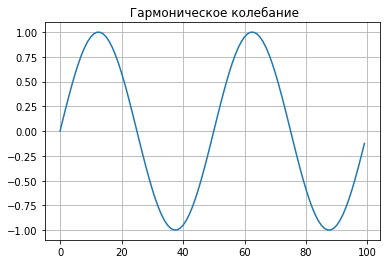

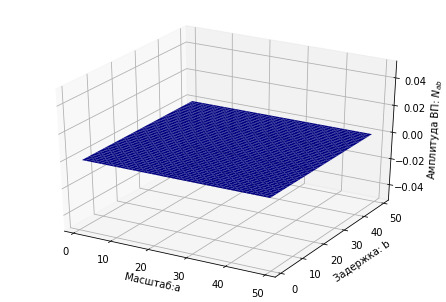

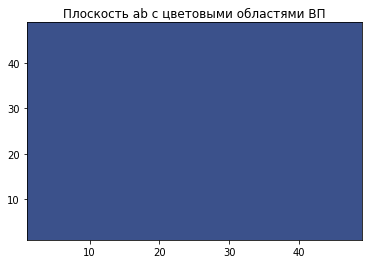

In [7]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
N=256
T=50
def S(t):
    return sin(2*pi*t/T)
plt.figure()
plt.title(' Гармоническое колебание', size=12)
y=[S(t) for t in arange(0,100,1)]
x=[t for t in arange(0,100,1)]
plt.plot(x,y)
plt.grid()
def w(a,b):    
    f = lambda t :fi(a, b, t)*S(t)
    r= quad(f, -N, N)
    return round(r[0],3)
x = arange(1,50,1)
y = arange(1,50,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(49,49)
fig = plt.figure("Вейвлет- спектр: гармонического колебания")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')
plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z,100)
plt.show()